# Convolutional Neural Network

### Importing the libraries

In [1]:
#!pip install --upgrade tensorflow keras Pillow # Already installed

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a third convolutional layer

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [11]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dropout(0.5)) # Avoid some overfitting

### Step 4 - Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [14]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [15]:
cnn_hist = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
250/250 [==============================] - 92s 364ms/step - loss: 0.6787 - accuracy: 0.5655 - val_loss: 0.6696 - val_accuracy: 0.5785
Epoch 2/50
250/250 [==============================] - 47s 188ms/step - loss: 0.6547 - accuracy: 0.6079 - val_loss: 0.6501 - val_accuracy: 0.6355
Epoch 3/50
250/250 [==============================] - 46s 184ms/step - loss: 0.6089 - accuracy: 0.6690 - val_loss: 0.6052 - val_accuracy: 0.6620
Epoch 4/50
250/250 [==============================] - 45s 180ms/step - loss: 0.5752 - accuracy: 0.6938 - val_loss: 0.5517 - val_accuracy: 0.7275
Epoch 5/50
250/250 [==============================] - 44s 174ms/step - loss: 0.5357 - accuracy: 0.7259 - val_loss: 0.5041 - val_accuracy: 0.7515
Epoch 6/50
250/250 [==============================] - 43s 173ms/step - loss: 0.5145 - accuracy: 0.7462 - val_loss: 0.5501 - val_accuracy: 0.7155
Epoch 7/50
250/250 [==============================] - 43s 174ms/step - loss: 0.4889 - accuracy: 0.7621 - val_loss: 0.4640 - val_ac

In [16]:
import matplotlib.pyplot as plt

loss = cnn_hist.history['loss']
accuracy = cnn_hist.history['accuracy']
val_loss = cnn_hist.history['val_loss']
val_accuracy = cnn_hist.history['val_accuracy']

### Plotting Train and validation accuracy

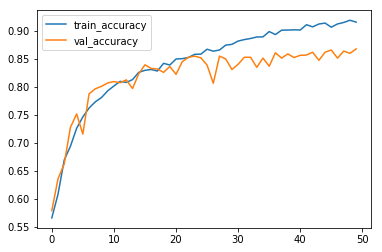

In [17]:
plt.plot(accuracy,label='train_accuracy')
plt.plot(val_accuracy,label='val_accuracy')
plt.legend()
plt.show()

### Plotting Train and validation loss

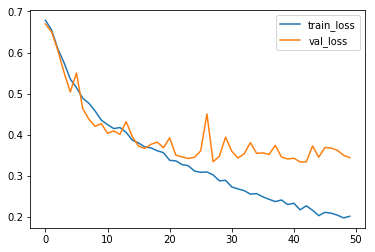

In [18]:
plt.plot(loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()
# ??????

## Part 4 - Making a single prediction

In [100]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [101]:
print(prediction)

dog


## Fim

> Adaptações: Italo Vinicius